# Steps:
### 1) Preprocess
### 2) Create Stacked LSTM model
### 3) Predict test data and plot it's output
### 4) Predict the future 10 days data         

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('AAPL.csv')

In [3]:
df.head(10)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
df1 = df.reset_index()['close'] 

In [7]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [8]:
import matplotlib.pyplot as plt

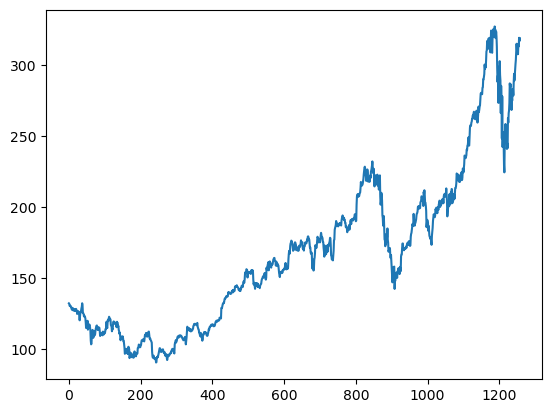

In [9]:
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))  # scale between 0 and 1
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) # -1 is used when we are not familiar about the dimension , numpy itself guesses the dimension

In [11]:
df1   #normalization

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

# Splitting the data

In [12]:
training_size = int(len(df1)*0.65) # 65 percent of the dataset is trained.
test_size = len(df1) - training_size # remaining 25 percent of the dataset is tested

train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [13]:
training_size, test_size

(817, 441)

In [14]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [15]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [16]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [], []
    for i in range(len(dataset)- time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
#reshape into x=t, t+1, t+2, t+3 then y=t+4
time_step = 100 #previous 100 data to predict the 101st  #1 to 100 datas are trained(input) and the 101st is tested(output).
x_train, y_train = create_dataset(train_data, time_step) #2 to 101 datas are trained(input) and the 102nd is tested(output).
x_test, y_test = create_dataset(test_data, time_step)    # and so on.......

In [18]:
print(x_train.shape),print(y_train.shape),print(x_test.shape) # 2D

(716, 100)
(716,)
(340, 100)


(None, None, None)

In [19]:
# reshape input cause LSTM is a sucker
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) #To add extra dimension to make it 3D.(716,100,1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
#Stacked LSTM model
model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape=(100,1))) # 50-Hiddenlayers #input layer,,time_step=100, dimension=1





model.add(LSTM(50, return_sequences = True)) # another layer of LSTM , 2nd layer





model.add(LSTM(50)) # 3rd layer of LSTM

model.add(Dense(1)) # fully connected dense layer(output layer) with dimension:1 #output layer

model.compile(loss='mean_squared_error',optimizer = 'adam') # adam is the type of optimizer(optimize the parame
# mean_squared_error-measures the average of the squares of the errors ie.the average squared difference between the estimated values and the actual value.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 70, batch_size = 64, verbose = 1)

Epoch 1/70
12/12 [==============================] - 16s 675ms/step - loss: 0.0148 - val_loss: 0.0697
Epoch 2/70
12/12 [==============================] - 5s 404ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 3/70
12/12 [==============================] - 5s 420ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 4/70
12/12 [==============================] - 5s 417ms/step - loss: 8.0001e-04 - val_loss: 0.0041
Epoch 5/70
12/12 [==============================] - 5s 417ms/step - loss: 6.6972e-04 - val_loss: 0.0049
Epoch 6/70
12/12 [==============================] - 5s 410ms/step - loss: 6.3971e-04 - val_loss: 0.0049
Epoch 7/70
12/12 [==============================] - 3s 288ms/step - loss: 6.2972e-04 - val_loss: 0.0050
Epoch 8/70
12/12 [==============================] - 5s 407ms/step - loss: 6.4233e-04 - val_loss: 0.0044
Epoch 9/70
12/12 [==============================] - 5s 398ms/step - loss: 5.9704e-04 - val_loss: 0.0044
Epoch 10/70
12/12 [==============================] - 5s 408ms/step - loss: 

In [24]:
import tensorflow as tf

In [25]:
train_predict = model.predict(x_train) 
test_predict = model.predict(x_test)

11/11 [==============================] - 1s 66ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

140.32096757450174

In [28]:
# Root mean squared error
math.sqrt(mean_squared_error(y_test, test_predict))

233.18095891030728

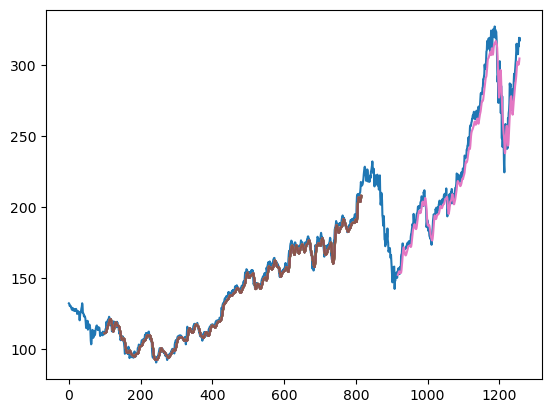

In [49]:
#plotting the graph to visualize the error
look_back = 100 #look_back is just a variable

trainPredictPlot = np.empty_like(df) #new empty numpy array with same shape as df #empty list taken

trainPredictPlot[:,:] = np.nan #inserting null values in the entire array

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)

testPredictPlot[:,:]=np.nan #null values are inserted in the graph.

testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [50]:
#predicting the future data

x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [52]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.922168]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

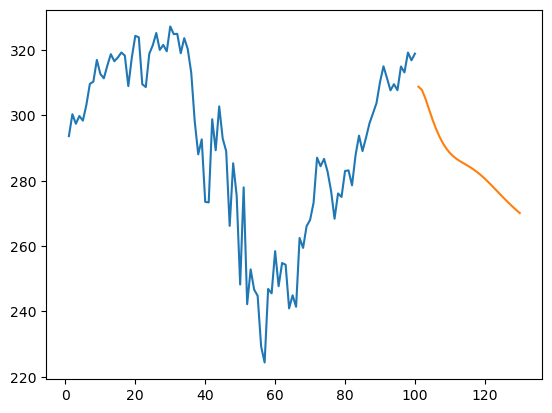

In [57]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output)) #orange line is prediction